## Ch `07`: Concept 02

## Autoencoder with images

Import the autoencoder class we wrote earlier:

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sys
import pickle
import numpy as np


In [0]:
colabGDriveEnv = True

In [60]:
'''
Enable this code for 
a) loading cifar 10 data into google colab from google Drive (Pls change relative path)
and
b) loading Autoencoder class from autoencoder.py file present
in Google Drive (Pls change relative path where autoencoder.py
file is present)
'''
if colabGDriveEnv == True:
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)
  sys.path.append('/content/drive/My Drive/PythonCode')
  from TensorflowBook.Ch07AutoEncoder.autoencoder_tf_1_0 import Autoencoder
else:
  from autoencoder import Autoencoder

Mounted at /content/drive


Define some helper function to load and preprocess the data:

In [0]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

Download the CIFAR-10 dataset in Python from https://www.cs.toronto.edu/~kriz/cifar.html. Then we can load the data using the following code:

In [0]:
names = unpickle('/content/drive/My Drive/cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = '/content/drive/My Drive/cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

data = grayscale(data)
x = np.matrix(data)
y = np.array(labels)

Train the autoencoder on images of horses:

(5000, 1024)
Some examples of horse images we will feed to the autoencoder for training


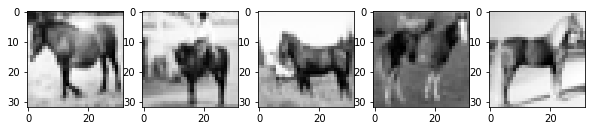

In [63]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [64]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

epoch 0: loss = 129.35763549804688
epoch 10: loss = 68.86241149902344
epoch 20: loss = 62.972835540771484
epoch 30: loss = 61.180023193359375
epoch 40: loss = 56.944664001464844
epoch 50: loss = 54.47120666503906
epoch 60: loss = 62.94175720214844
epoch 70: loss = 57.986541748046875
epoch 80: loss = 56.31074142456055
epoch 90: loss = 55.59040069580078
epoch 100: loss = 55.995269775390625
epoch 110: loss = 53.471595764160156
epoch 120: loss = 51.73677444458008
epoch 130: loss = 58.27556228637695
epoch 140: loss = 50.697418212890625
epoch 150: loss = 51.441429138183594
epoch 160: loss = 50.59246826171875
epoch 170: loss = 53.2487678527832
epoch 180: loss = 50.94256591796875
epoch 190: loss = 50.254310607910156
epoch 200: loss = 52.281219482421875
epoch 210: loss = 56.897422790527344
epoch 220: loss = 51.173030853271484
epoch 230: loss = 47.47669982910156
epoch 240: loss = 51.11060333251953
epoch 250: loss = 50.04194259643555
epoch 260: loss = 47.88330078125
epoch 270: loss = 52.228488922

Test the autoencoder on other images:

In [65]:
test_data = unpickle('/content/drive/My Drive/cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encodings = ae.classify(test_x, test_labels)

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 62.04232034568378
not horse 61.67435870000455


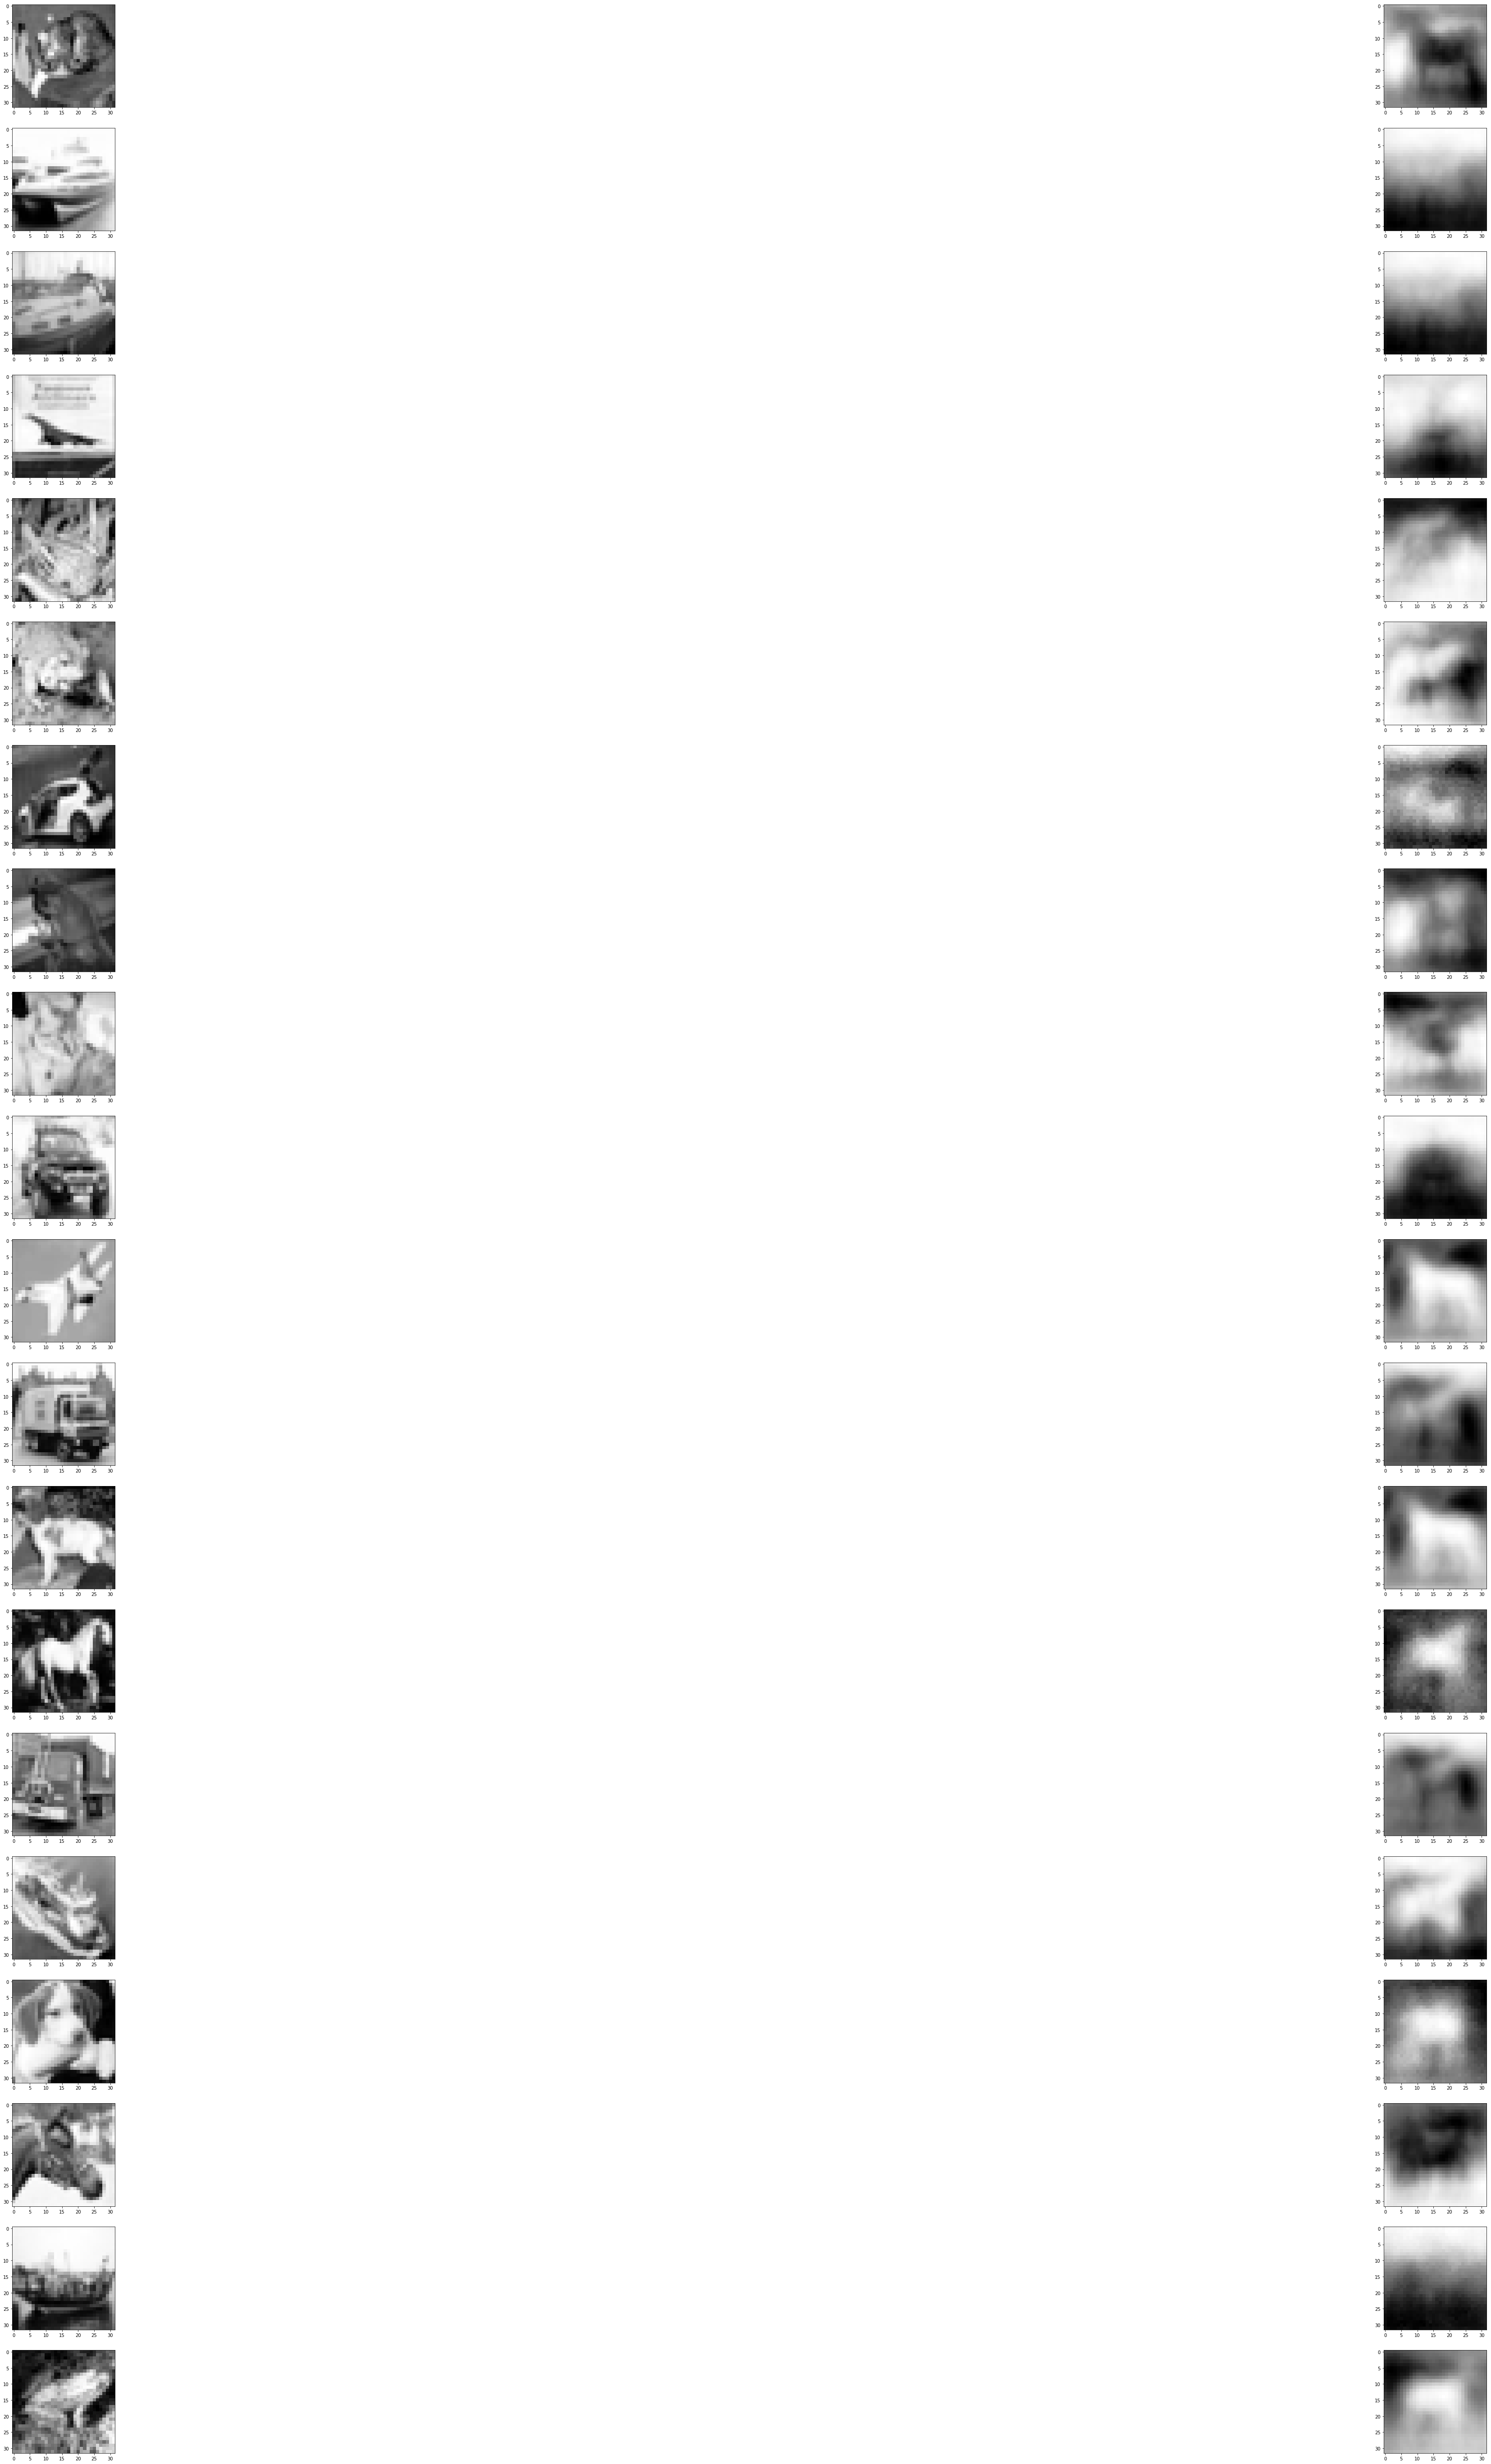

In [66]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae.decode([encodings[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()